# Datahack - Proyecto Final

In [3]:
import numpy
import pandas
import os

In [7]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Lectura de archivos

In [9]:
path_archivos = '/content/drive/My Drive/datahack/notebooks/data_proyecto_final'
os.listdir(path_archivos)

['world_cups.xlsx']

In [11]:
df_mundiales = pandas.read_excel(f'{path_archivos}/world_cups.xlsx', sheet_name= 'world_cups')

In [71]:
df_matches = pandas.read_excel(f'{path_archivos}/world_cups.xlsx', sheet_name= 'matches')

In [13]:
df_players = pandas.read_excel(f'{path_archivos}/world_cups.xlsx', sheet_name= 'players')

In [14]:
df_mundiales.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.7
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


In [15]:
df_matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,4444.0,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,18346.0,2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,24059.0,2,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,1093,YUG,BRA
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,2549.0,1,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,1098,ROU,PER
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,,23409.0,0,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,1085,ARG,FRA


In [67]:
df_matches.columns

Index(['Year', 'Datetime', 'Stage', 'Stadium', 'City', 'Home Team Name',
       'Home Team Goals', 'Away Team Goals', 'Away Team Name',
       'Win conditions', 'Attendance', 'Half-time Home Goals',
       'Half-time Away Goals', 'Referee', 'Assistant 1', 'Assistant 2',
       'RoundID', 'MatchID', 'Home Team Initials', 'Away Team Initials'],
      dtype='object')

In [16]:
df_players.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


## ¿De cuántos mundiales tenemos información?

In [17]:
df_mundiales.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.7
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


In [18]:
df_mundiales.shape

(20, 10)

In [19]:
len(df_mundiales)

20

## Obtener el nombre completo de cada mundial

* Uruguay 1930
* Brasil 2014

In [21]:
df_mundiales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            20 non-null     int64 
 1   Country         20 non-null     object
 2   Winner          20 non-null     object
 3   Runners-Up      20 non-null     object
 4   Third           20 non-null     object
 5   Fourth          20 non-null     object
 6   GoalsScored     20 non-null     int64 
 7   QualifiedTeams  20 non-null     int64 
 8   MatchesPlayed   20 non-null     int64 
 9   Attendance      20 non-null     object
dtypes: int64(4), object(6)
memory usage: 1.7+ KB


In [22]:
df_mundiales['Year'] = df_mundiales['Year'].astype('str')

In [23]:
df_mundiales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            20 non-null     object
 1   Country         20 non-null     object
 2   Winner          20 non-null     object
 3   Runners-Up      20 non-null     object
 4   Third           20 non-null     object
 5   Fourth          20 non-null     object
 6   GoalsScored     20 non-null     int64 
 7   QualifiedTeams  20 non-null     int64 
 8   MatchesPlayed   20 non-null     int64 
 9   Attendance      20 non-null     object
dtypes: int64(3), object(7)
memory usage: 1.7+ KB


In [26]:
df_mundiales['Name'] = df_mundiales['Country'] + " " + df_mundiales['Year']

In [27]:
df_mundiales.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance,Name
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549,Uruguay 1930
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363,Italy 1934
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.7,France 1938
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246,Brazil 1950
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607,Switzerland 1954


In [28]:
columnas = list(df_mundiales.columns)
columnas

['Year',
 'Country',
 'Winner',
 'Runners-Up',
 'Third',
 'Fourth',
 'GoalsScored',
 'QualifiedTeams',
 'MatchesPlayed',
 'Attendance',
 'Name']

In [29]:
columnas = ['Name'] + columnas[:-1]
columnas

['Name',
 'Year',
 'Country',
 'Winner',
 'Runners-Up',
 'Third',
 'Fourth',
 'GoalsScored',
 'QualifiedTeams',
 'MatchesPlayed',
 'Attendance']

In [30]:
df_mundiales = df_mundiales.get(columnas)
df_mundiales.head()

,Name,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,Uruguay 1930,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,Italy 1934,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363
2,France 1938,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.7
3,Brazil 1950,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,Switzerland 1954,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


## Países que campeonaron de locales

In [31]:
df_locales = df_mundiales.loc[df_mundiales['Country'] == df_mundiales['Winner']]
df_locales

,Name,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,Uruguay 1930,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,Italy 1934,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363
7,England 1966,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1.563.135
10,Argentina 1978,1978,Argentina,Argentina,Netherlands,Brazil,Italy,102,16,38,1.545.791
15,France 1998,1998,France,France,Brazil,Croatia,Netherlands,171,32,64,2.785.100


In [32]:
df_locales_2 = df_mundiales.query('Country == Winner')
df_locales_2

,Name,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,Uruguay 1930,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,Italy 1934,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363
7,England 1966,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1.563.135
10,Argentina 1978,1978,Argentina,Argentina,Netherlands,Brazil,Italy,102,16,38,1.545.791
15,France 1998,1998,France,France,Brazil,Croatia,Netherlands,171,32,64,2.785.100


## Partidos de mundial con más goles

In [34]:
df_matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,4444.0,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,18346.0,2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,24059.0,2,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,1093,YUG,BRA
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,2549.0,1,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,1098,ROU,PER
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,,23409.0,0,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,1085,ARG,FRA


In [35]:
df_matches_relevant = df_matches.get(['Year', 'Home Team Name', 'Away Team Name', 'Home Team Goals', 'Away Team Goals'])

In [36]:
df_matches_relevant.head()

,Year,Home Team Name,Away Team Name,Home Team Goals,Away Team Goals
0,1930,France,Mexico,4,1
1,1930,USA,Belgium,3,0
2,1930,Yugoslavia,Brazil,2,1
3,1930,Romania,Peru,3,1
4,1930,Argentina,France,1,0


In [37]:
df_matches_relevant['Total Goals'] = df_matches_relevant['Home Team Goals'] + df_matches_relevant['Away Team Goals']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [38]:
df_matches_relevant.head()

,Year,Home Team Name,Away Team Name,Home Team Goals,Away Team Goals,Total Goals
0,1930,France,Mexico,4,1,5
1,1930,USA,Belgium,3,0,3
2,1930,Yugoslavia,Brazil,2,1,3
3,1930,Romania,Peru,3,1,4
4,1930,Argentina,France,1,0,1


In [40]:
df_matches_relevant.sort_values(by = 'Total Goals', ascending= False).head(20)

,Year,Home Team Name,Away Team Name,Home Team Goals,Away Team Goals,Total Goals
94,1954,Austria,Switzerland,7,5,12
312,1982,Hungary,El Salvador,10,1,11
87,1954,Hungary,Germany FR,8,3,11
40,1938,Brazil,Poland,6,5,11
105,1958,France,Paraguay,7,3,10
10,1930,Argentina,Mexico,6,3,9
91,1954,Germany FR,Turkey,7,2,9
243,1974,Yugoslavia,Zaire,9,0,9
80,1954,Hungary,Korea Republic,9,0,9
134,1958,France,Germany FR,6,3,9


In [41]:
df_matches_relevant.sort_values(by = 'Total Goals', ascending= False)\
                    .loc[df_matches_relevant['Year'] > 2000]\
                    .head(20)

,Year,Home Team Name,Away Team Name,Home Team Goals,Away Team Goals,Total Goals
848,2014,Brazil,Germany,1,7,8
826,2014,Brazil,Germany,1,7,8
583,2002,Germany,Saudi Arabia,8,0,8
737,2010,Portugal,Korea DPR,7,0,7
796,2014,Switzerland,France,2,5,7
620,2002,Costa Rica,Brazil,2,5,7
774,2014,Spain,Netherlands,1,5,6
802,2014,Korea Republic,Algeria,2,4,6
613,2002,Senegal,Uruguay,3,3,6
644,2006,Germany,Costa Rica,4,2,6


## Goles promedio por partido para cada mundial

In [43]:
df_mundiales.head()

,Name,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,Uruguay 1930,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,Italy 1934,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363
2,France 1938,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.7
3,Brazil 1950,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,Switzerland 1954,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


In [44]:
df_mundiales['AvgGoals'] = df_mundiales['GoalsScored'] / df_mundiales['MatchesPlayed']
df_mundiales.head()

,Name,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance,AvgGoals
0,Uruguay 1930,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549,3.888889
1,Italy 1934,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363,4.117647
2,France 1938,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.7,4.666667
3,Brazil 1950,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246,4.000000
4,Switzerland 1954,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607,5.384615


## Goleadores históricos de los mundiales

In [75]:
df_players.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


In [77]:
df_players_events = df_players.dropna(subset = ['Event'])
df_players_events.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
6,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Andre MASCHINOT,NaN,G43' G87'
14,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Lucien LAURENT,NaN,G19'
35,201,1090,USA,MILLAR Bob (USA),S,0,Tom FLORIE,C,G45'


In [78]:
df_players_events.head(100)

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
6,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Andre MASCHINOT,NaN,G43' G87'
14,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Lucien LAURENT,NaN,G19'
35,201,1090,USA,MILLAR Bob (USA),S,0,Tom FLORIE,C,G45'
...,...,...,...,...,...,...,...,...,...
1140,418,1106,HUN,NADAS Odon (HUN),S,0,Gyorgy SAROSI,NaN,P60'
1143,418,1106,AUT,MEISL Hugo (AUT),S,0,Johann HORVATH,C,G8'
1146,418,1106,HUN,NADAS Odon (HUN),S,0,Imre MARKOS,NaN,R63'
1153,418,1106,AUT,MEISL Hugo (AUT),S,0,Karl ZISCHEK,NaN,G51'


In [79]:
def cantidad_goles(cadena):
    return cadena.count('G')

In [80]:
cantidad_goles("G43' G87'")

2

In [81]:
df_players_events['Goals'] = df_players_events['Event'].apply(cantidad_goles)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [82]:
df_players_events.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event,Goals
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40',1
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70',1
6,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Andre MASCHINOT,NaN,G43' G87',2
14,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Lucien LAURENT,NaN,G19',1
35,201,1090,USA,MILLAR Bob (USA),S,0,Tom FLORIE,C,G45',1


In [86]:
df_players_events.get(['Player Name', 'Goals'])\
                .groupby('Player Name')\
                .sum()\
                .sort_values(by = 'Goals', ascending = False)\
                .head(10)

,Goals
Player Name,
KLOSE,17
RONALDO,16
Just FONTAINE,13
Gerd MUELLER,13
PELÔøΩ (Edson Arantes do Nascimento),12
Sandor KOCSIS,11
MÔøΩLLER,11
Grzegorz LATO,10
Helmut RAHN,10


## Gráfico de barras con la cantidad de goles por Mundial

In [94]:
df_mundiales.head()

,Name,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance,AvgGoals
0,Uruguay 1930,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549,3.888889
1,Italy 1934,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363,4.117647
2,France 1938,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.7,4.666667
3,Brazil 1950,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246,4.000000
4,Switzerland 1954,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607,5.384615


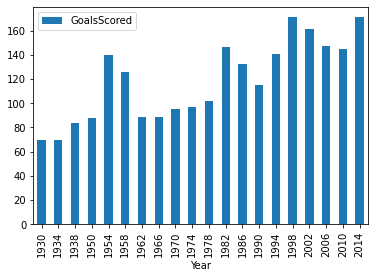

In [95]:
df_mundiales.plot(kind = 'bar', x = 'Year', y ='GoalsScored')

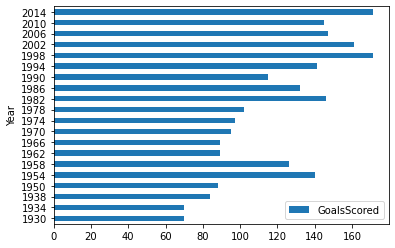

In [96]:
df_mundiales.plot(kind = 'barh', x = 'Year', y ='GoalsScored')